In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import bootstrap
import numpy as np

from Simulation import Simulation 

In [2]:
#get the simulation class
simulation = Simulation(allocation=None)
simulation_results = simulation.run_pipeline()

INIT
POP -- DONE
SAMPLE -- DONE
ESTIMATES -- DONE


In [3]:
# your main results
data = pd.DataFrame({
    "x": simulation_results["population"]["x"],
    "y": simulation_results["population"]["y"]
})

# your groups (list of index lists)
tag_groups = simulation_results["population"]["domains"]

# create names for them
tag_names = [f"domain_{i+1}" for i in range(len(tag_groups))]

# build mapping from row index → tag
records = []
for tag, indices in zip(tag_names, tag_groups):
    for idx in indices:
        records.append((idx, tag))

df_tags = pd.DataFrame(records, columns=["index", "tag"])

# merge with data
df_with_tags = data.reset_index().merge(df_tags, on="index")

df_with_tags.sort_values(by= "tag", inplace=True)

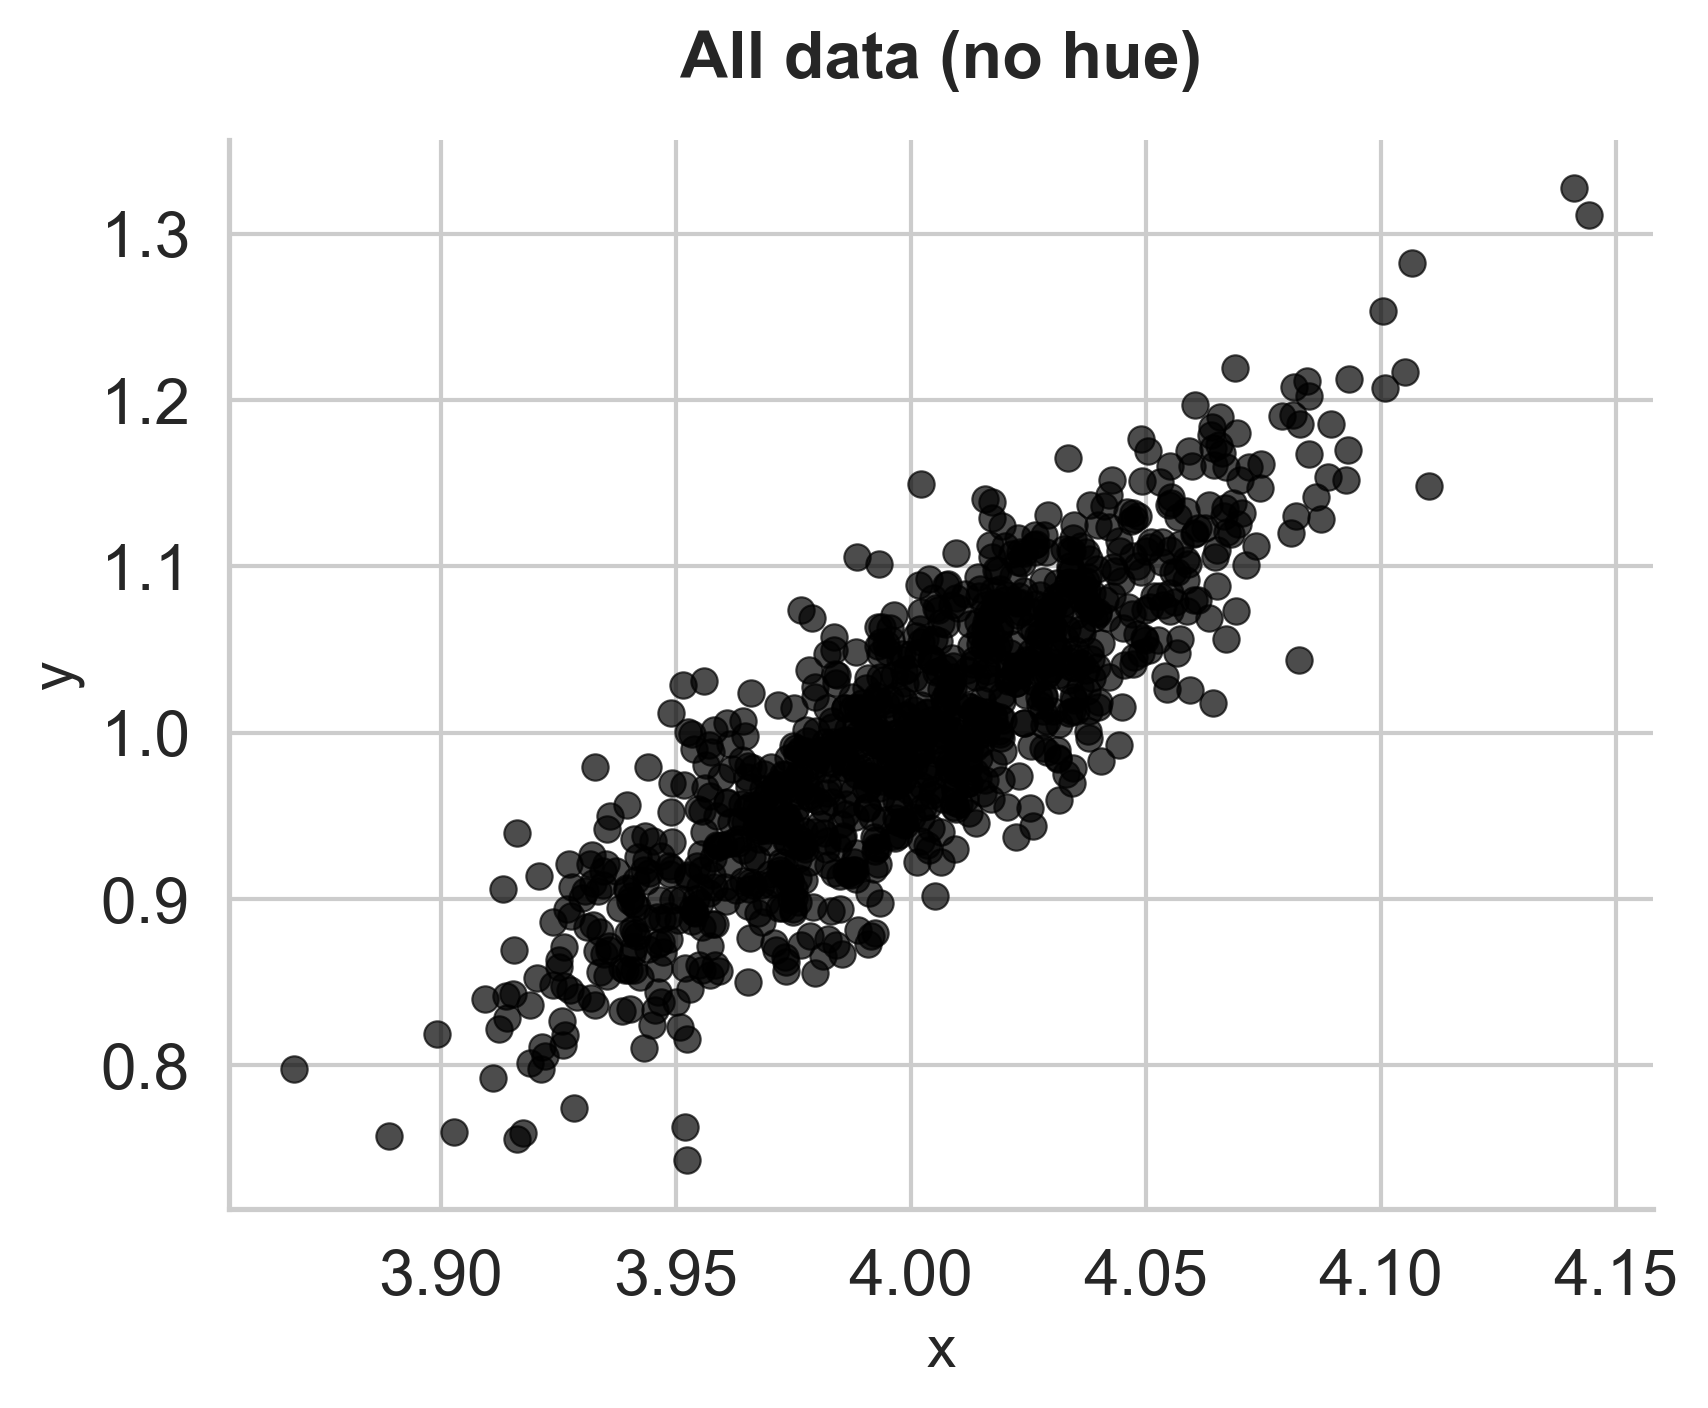

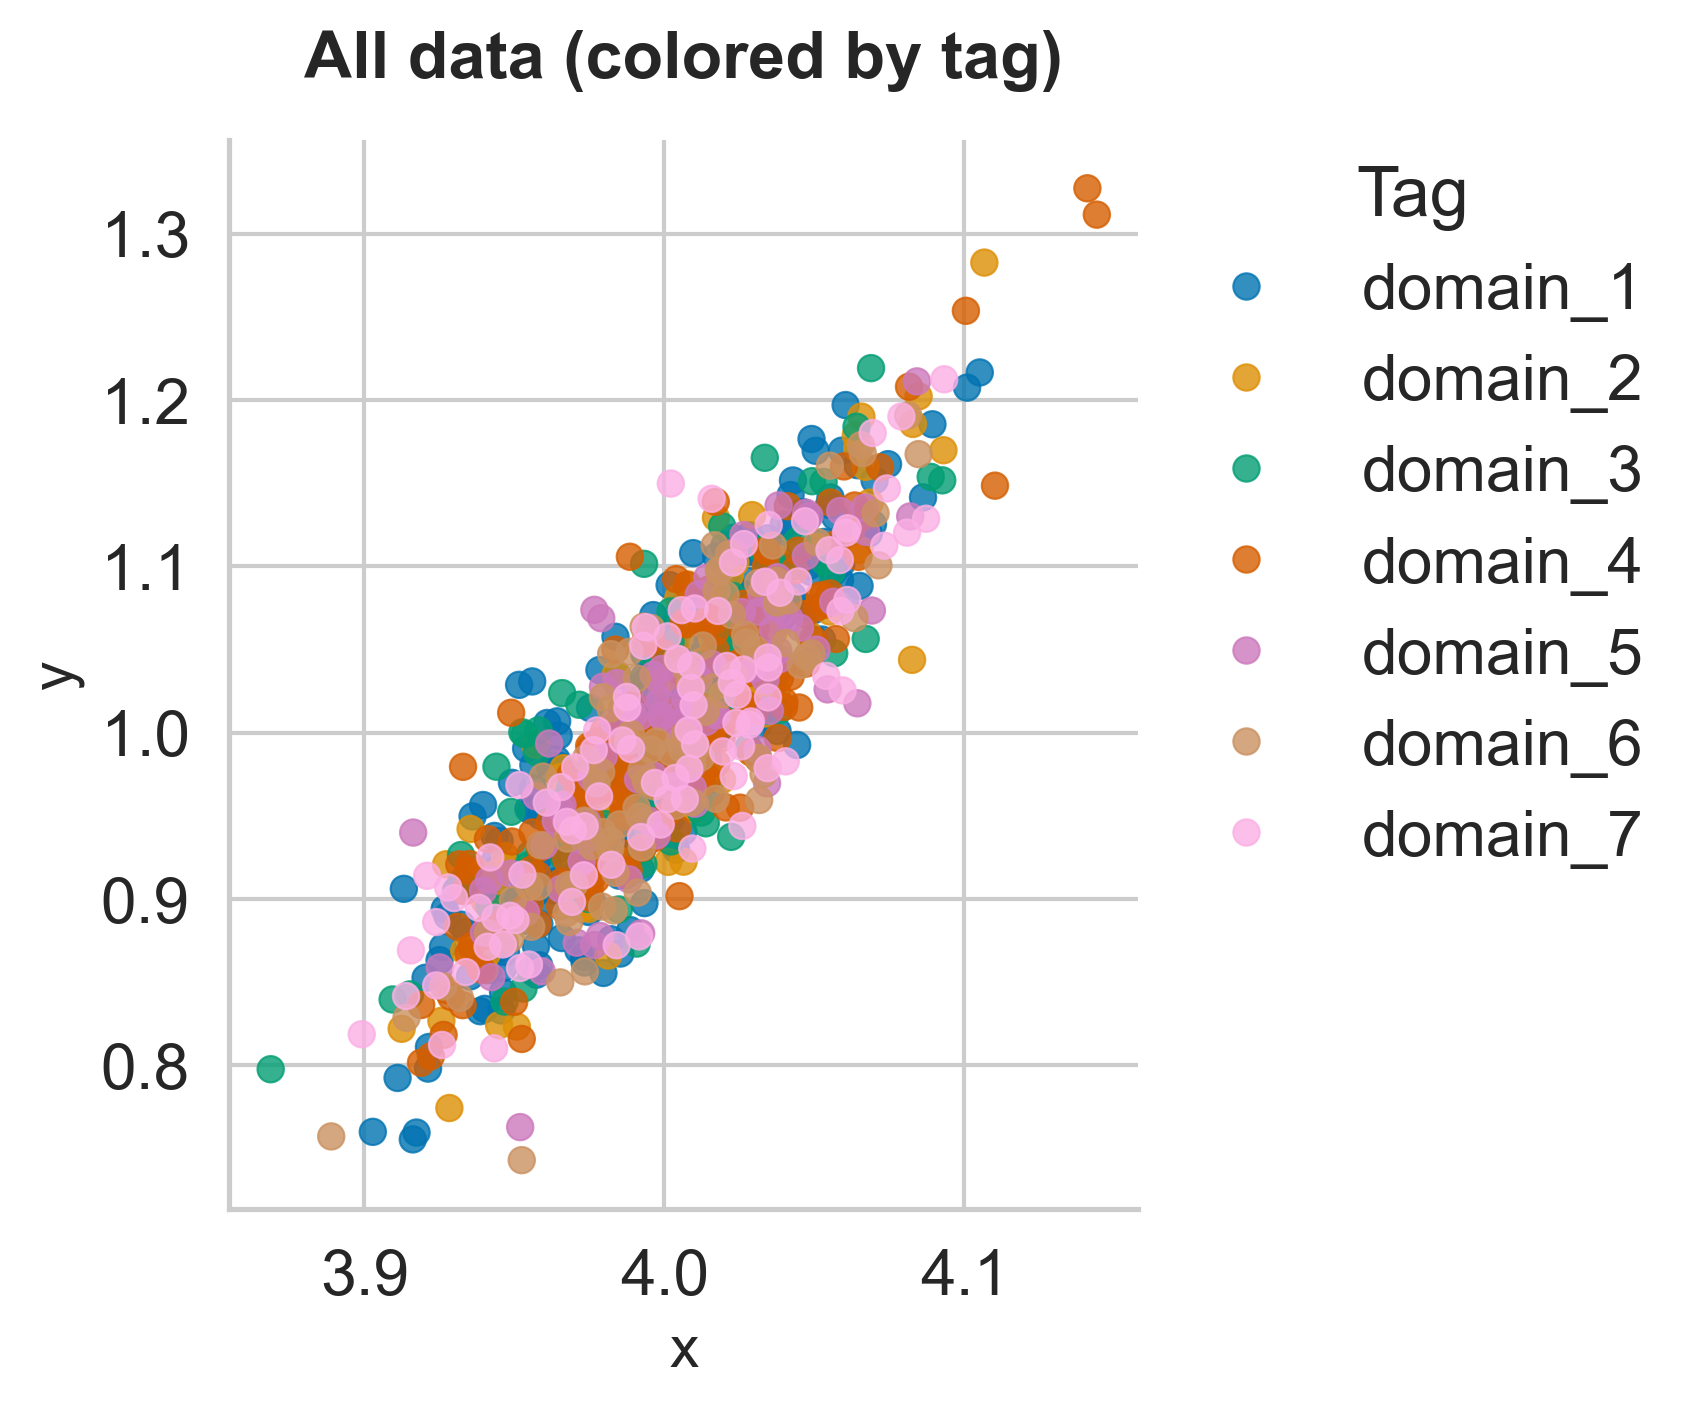

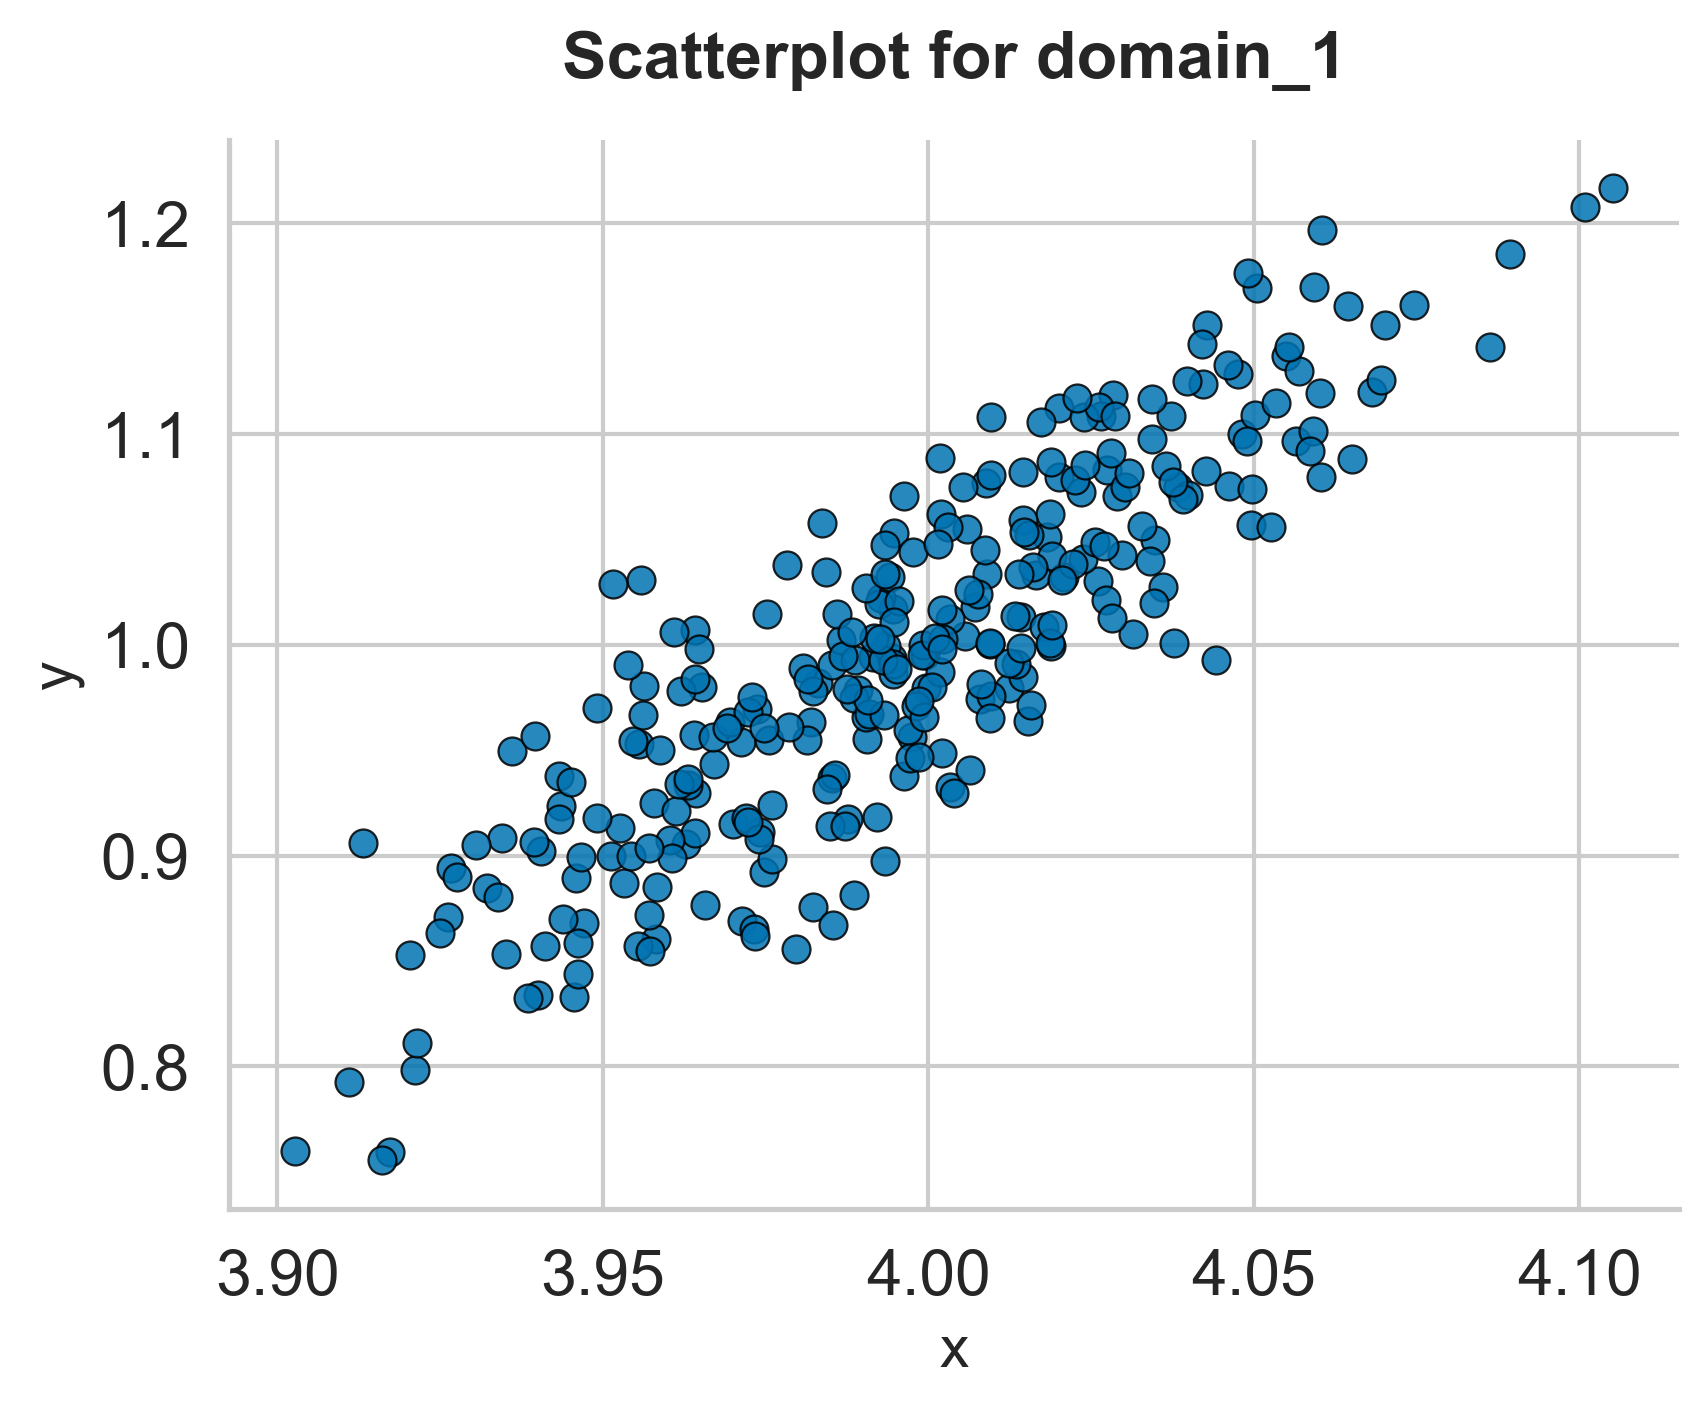

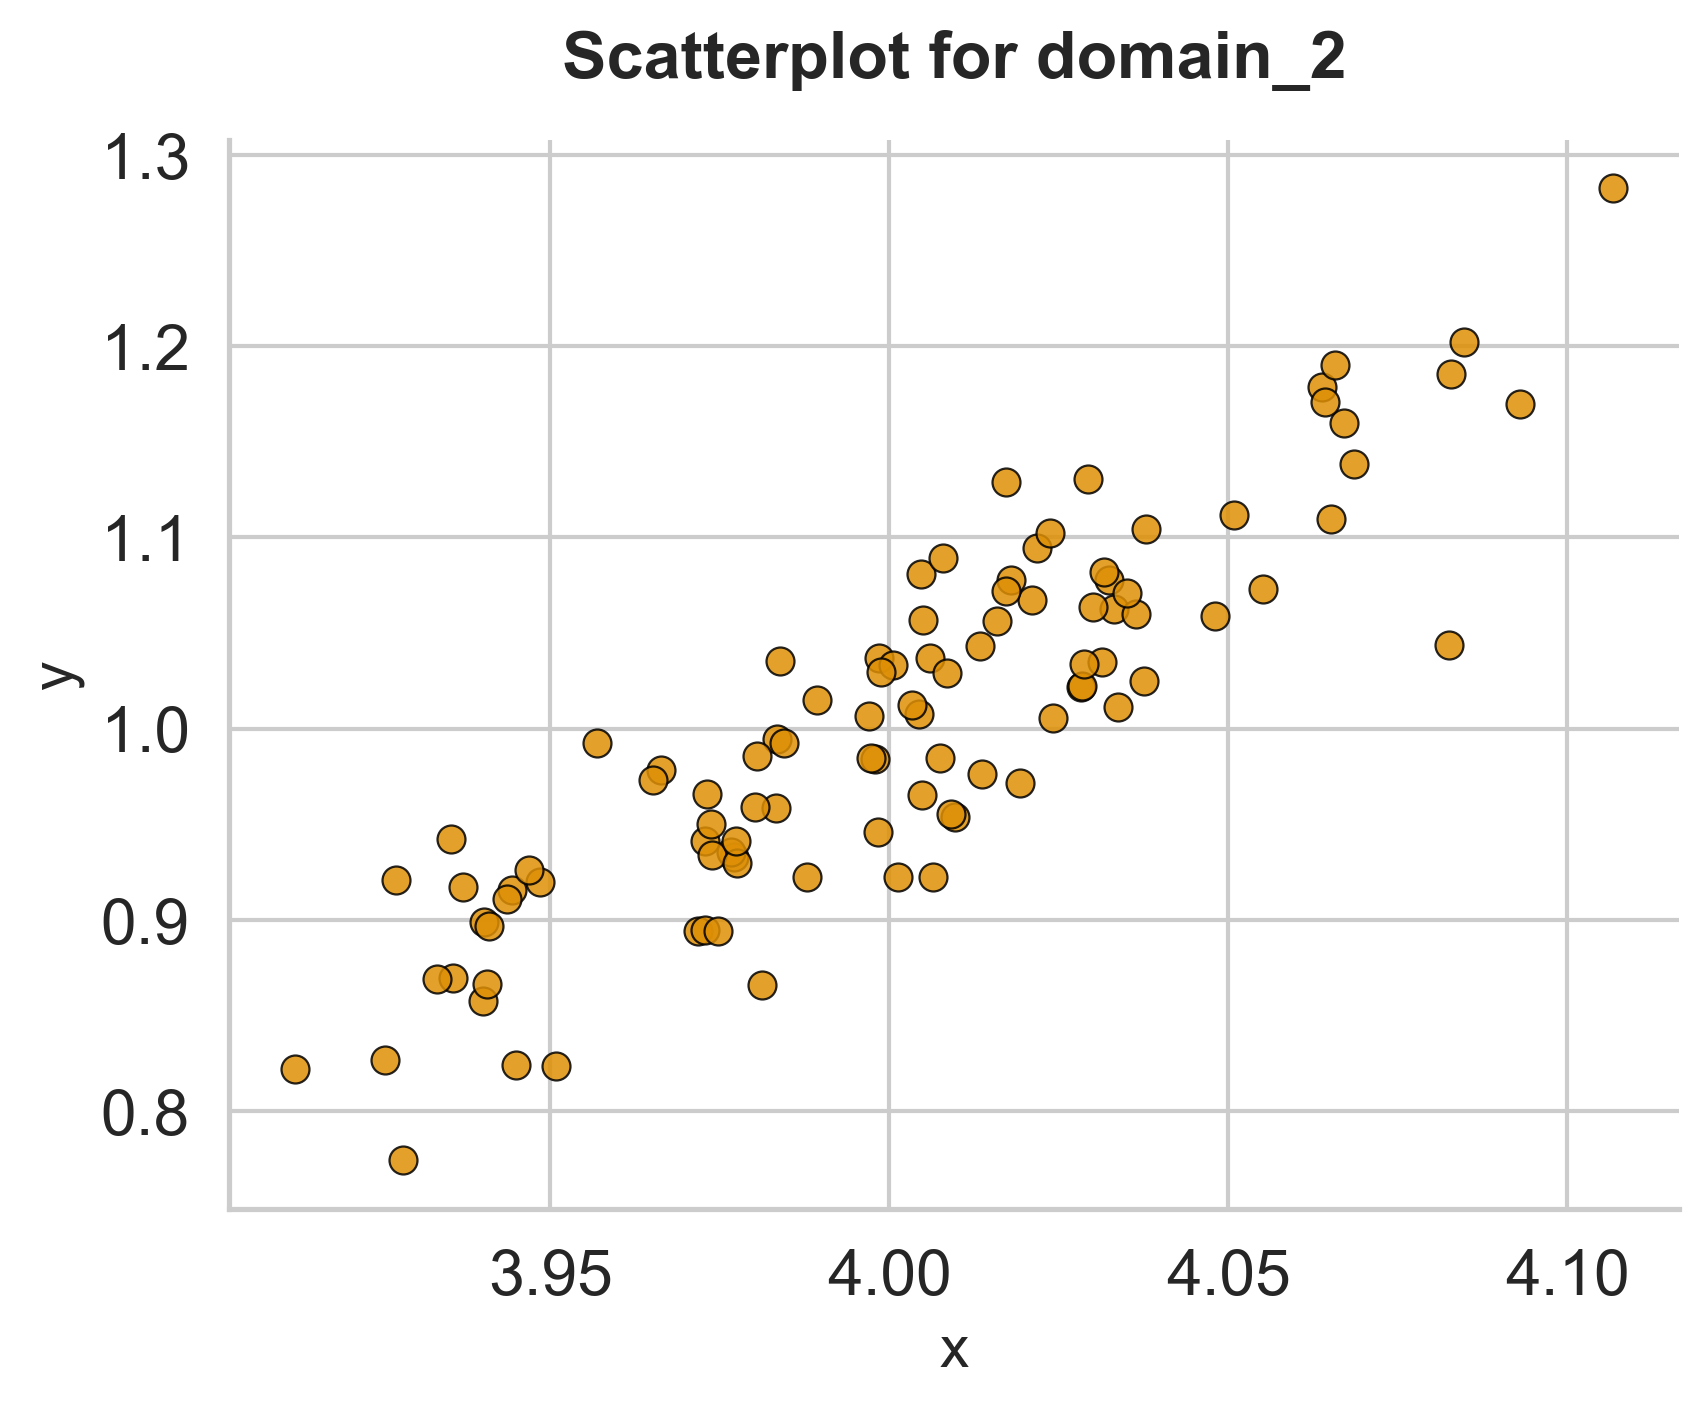

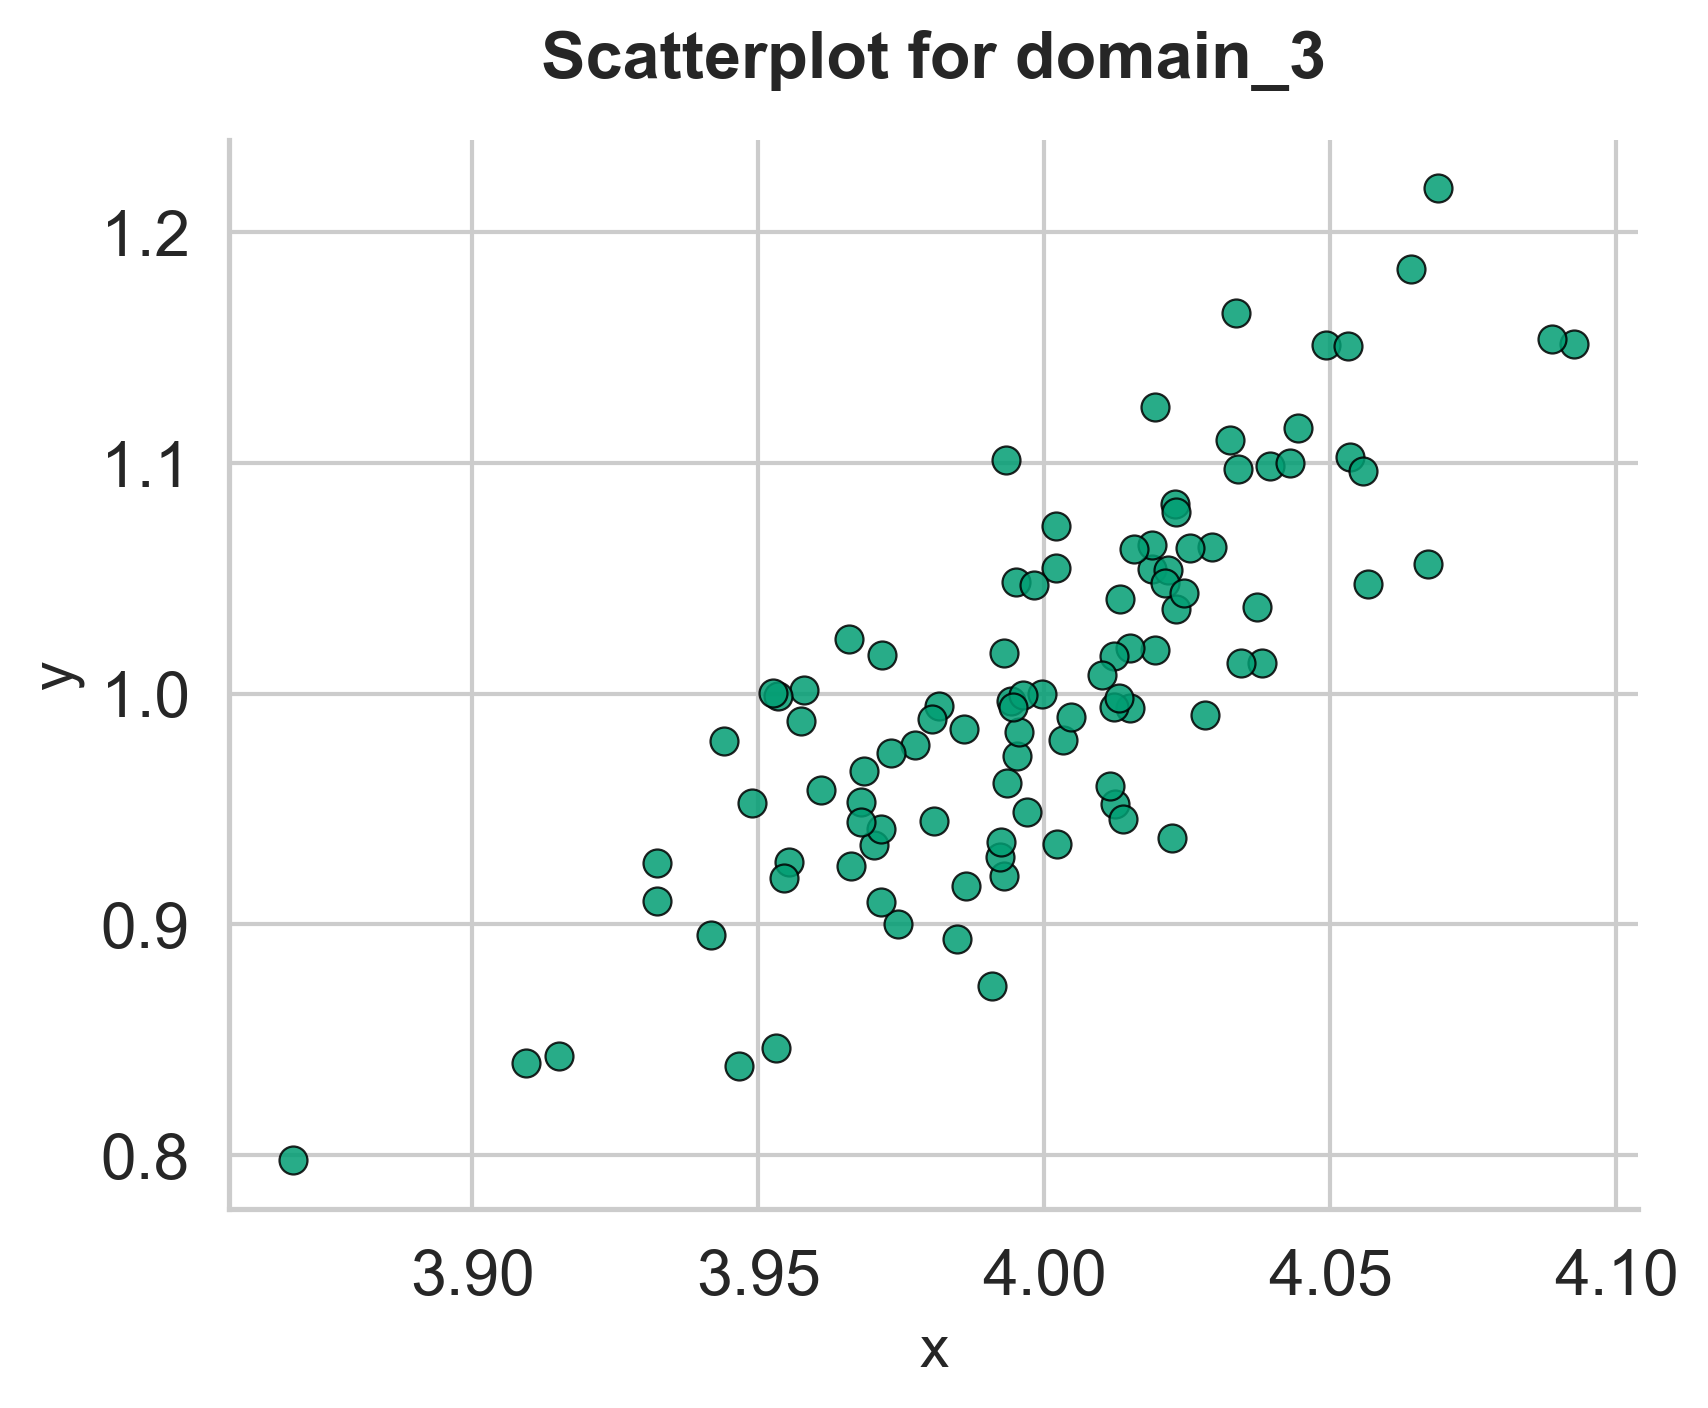

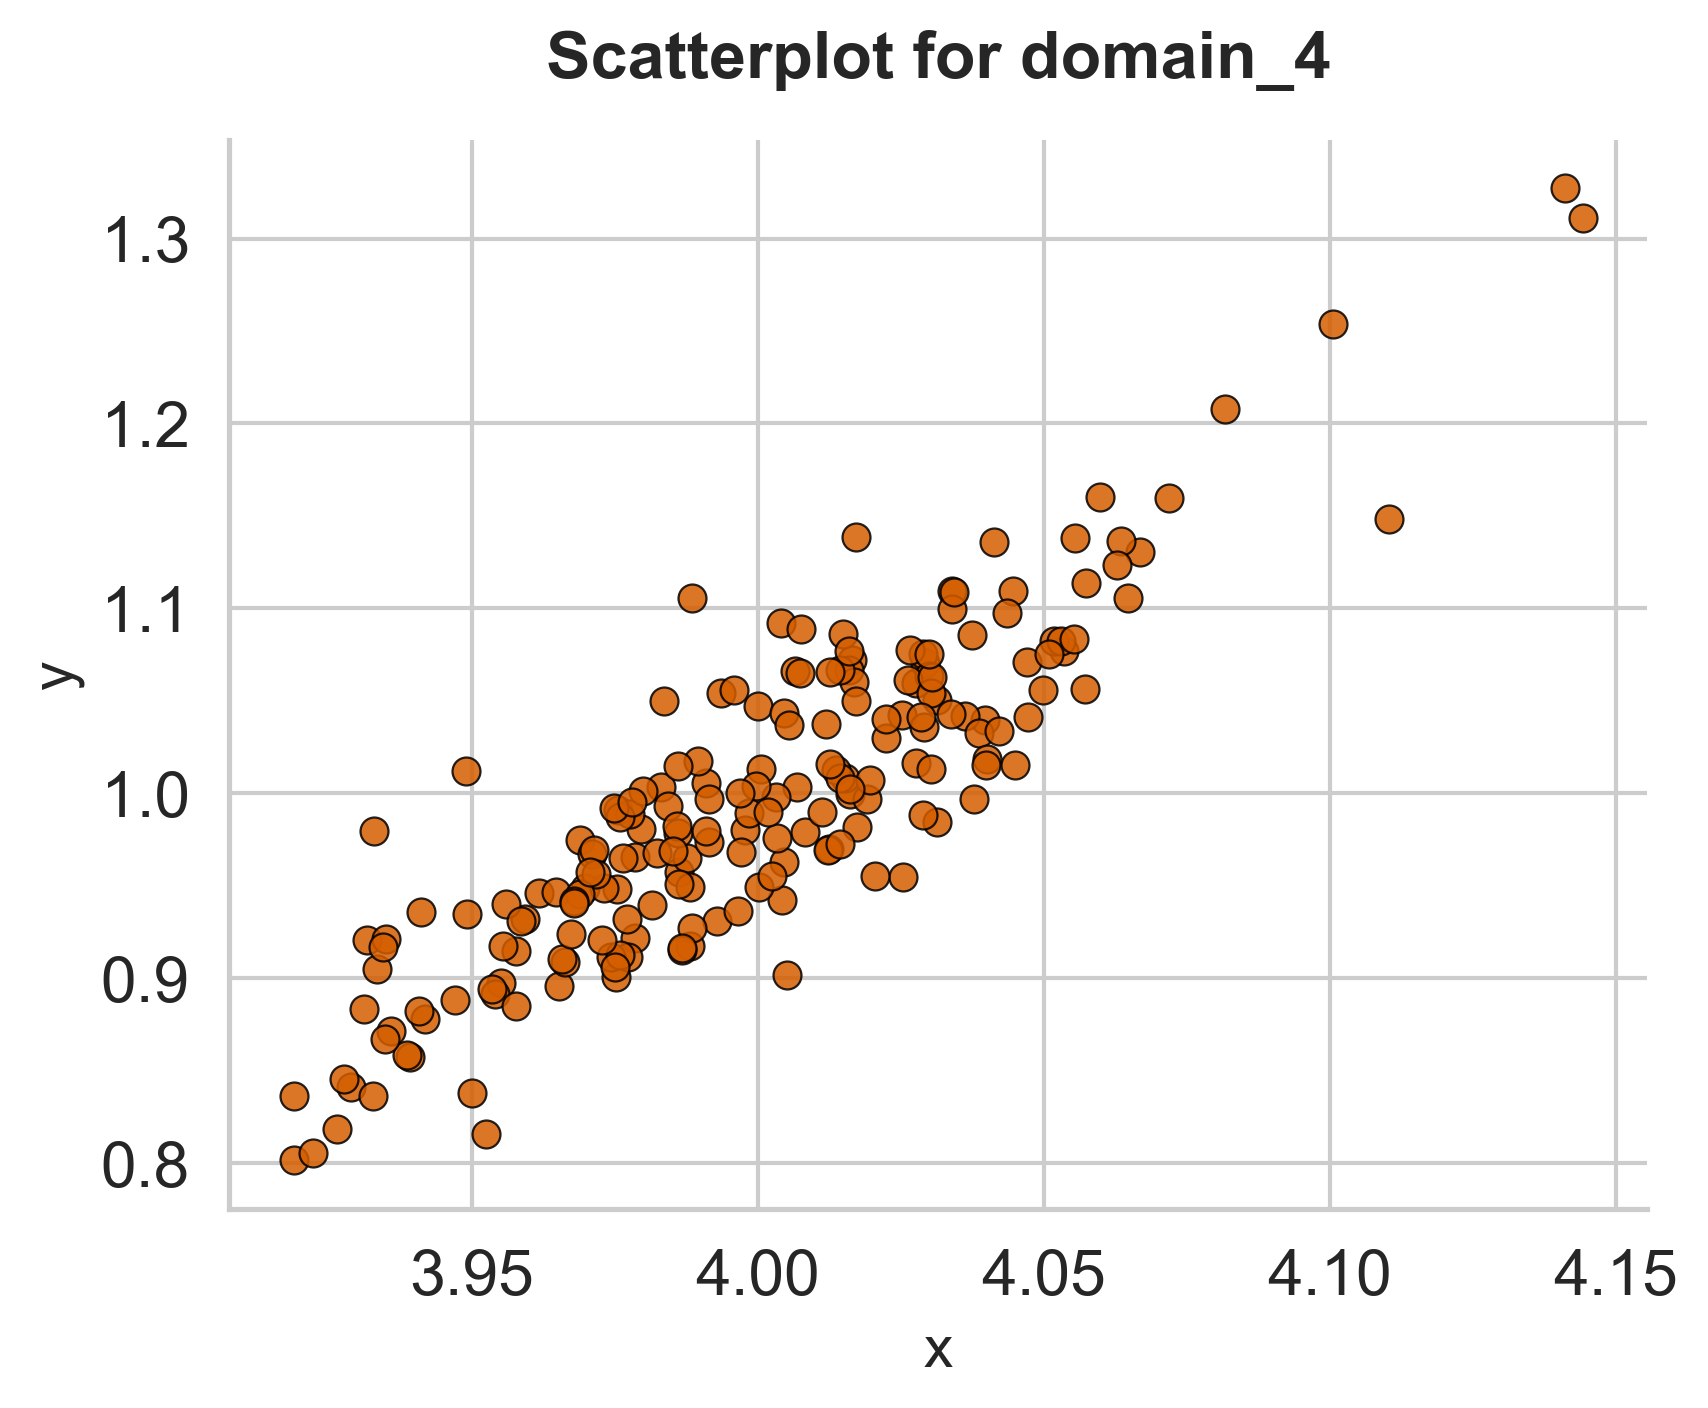

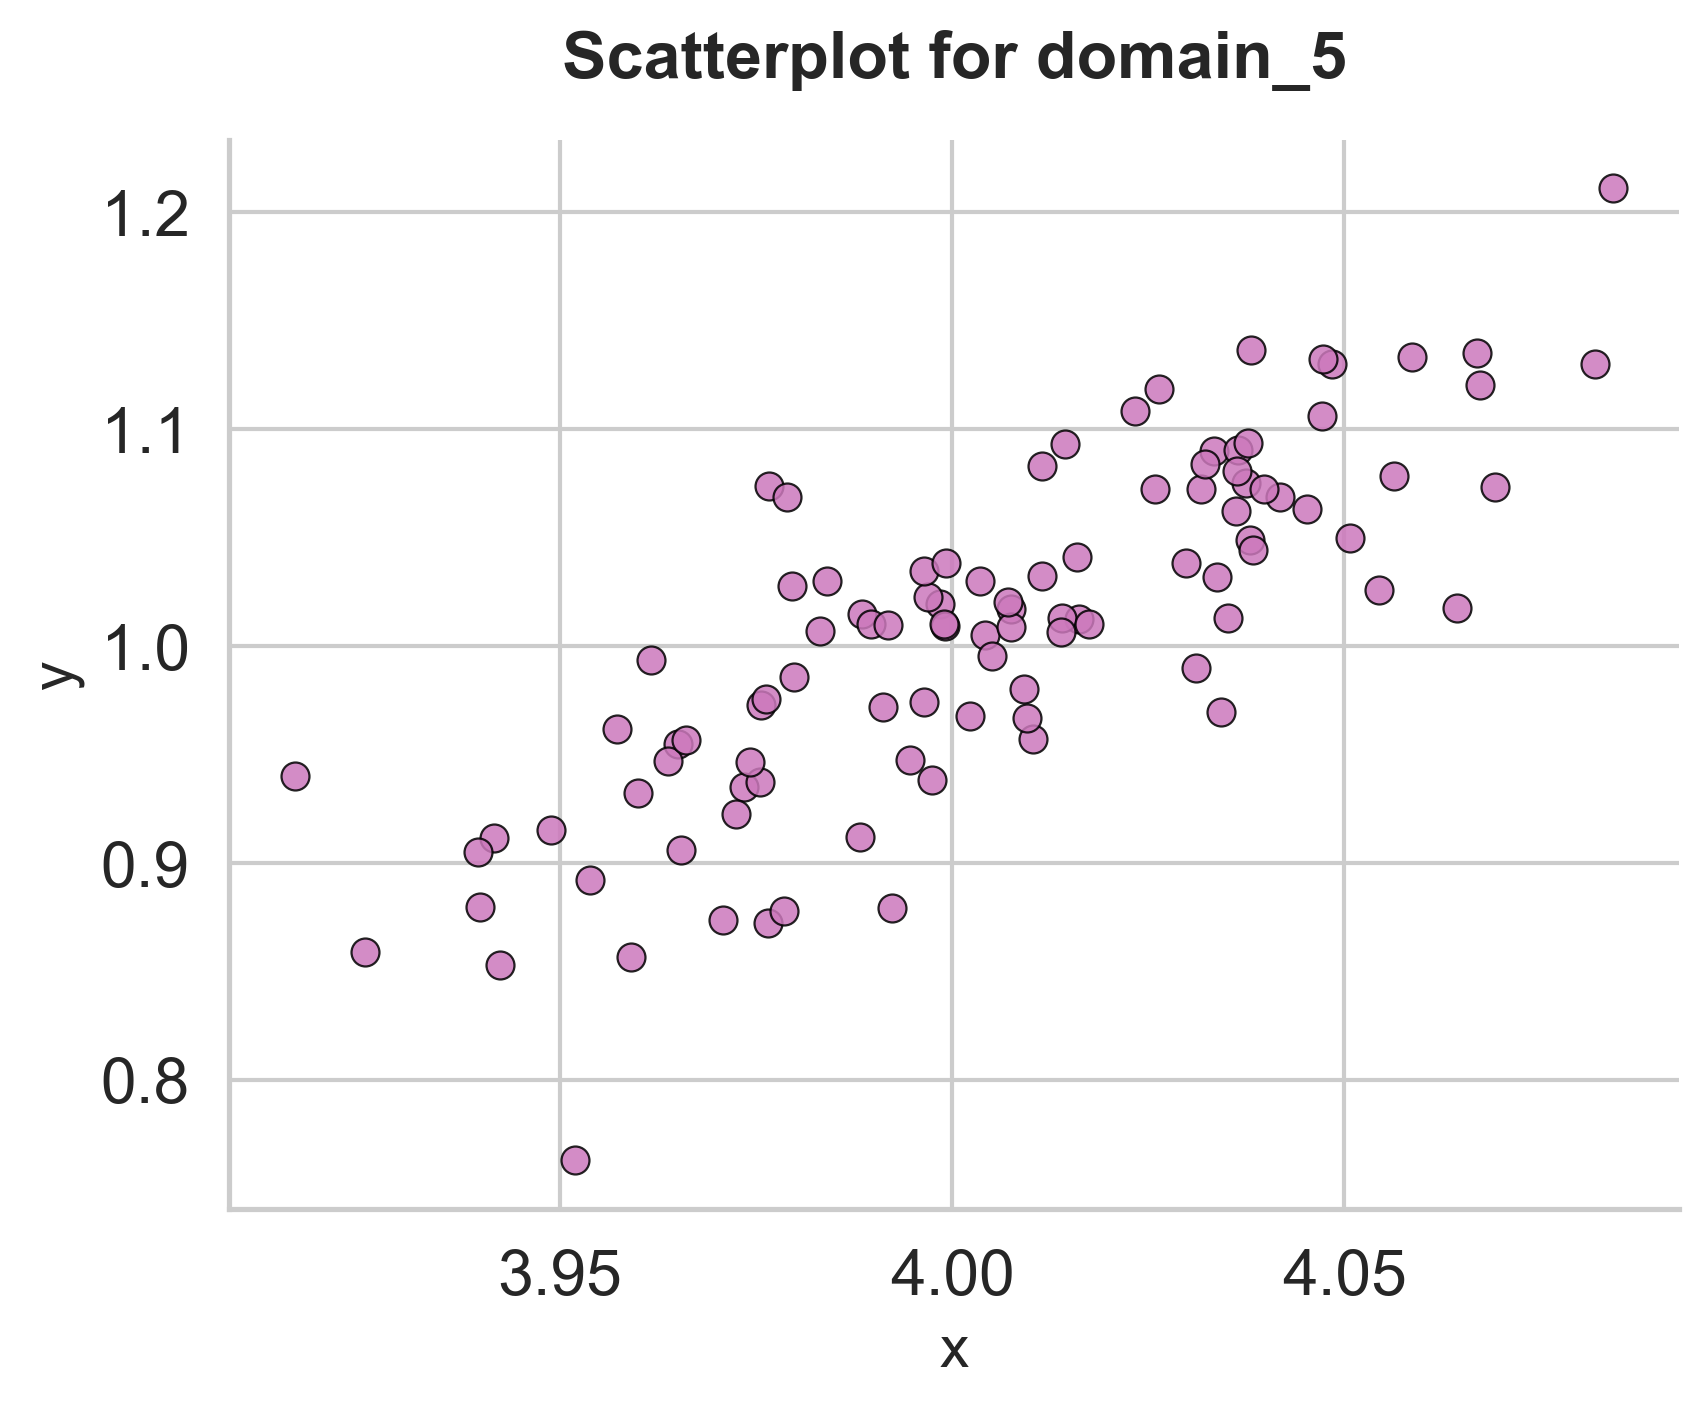

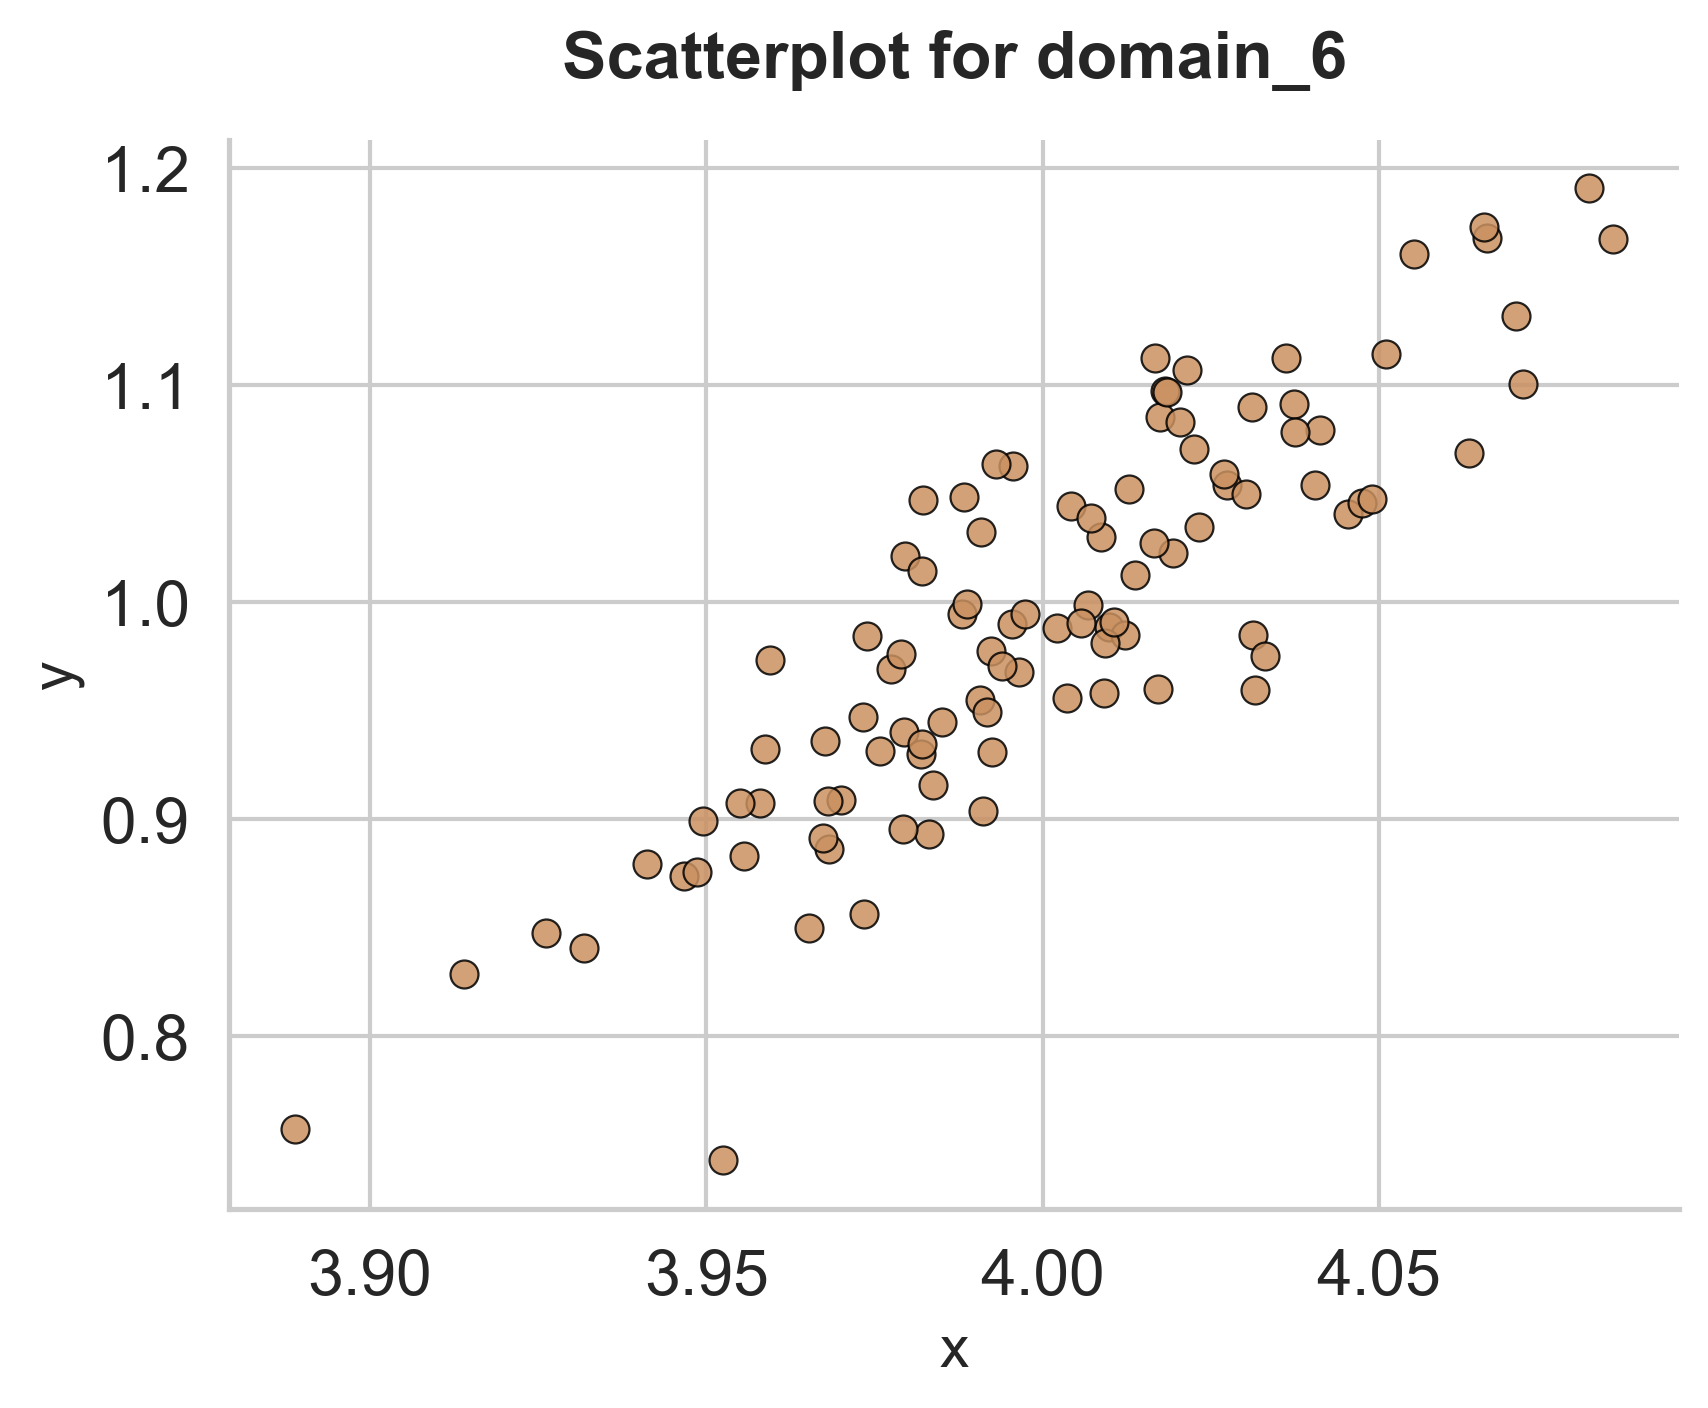

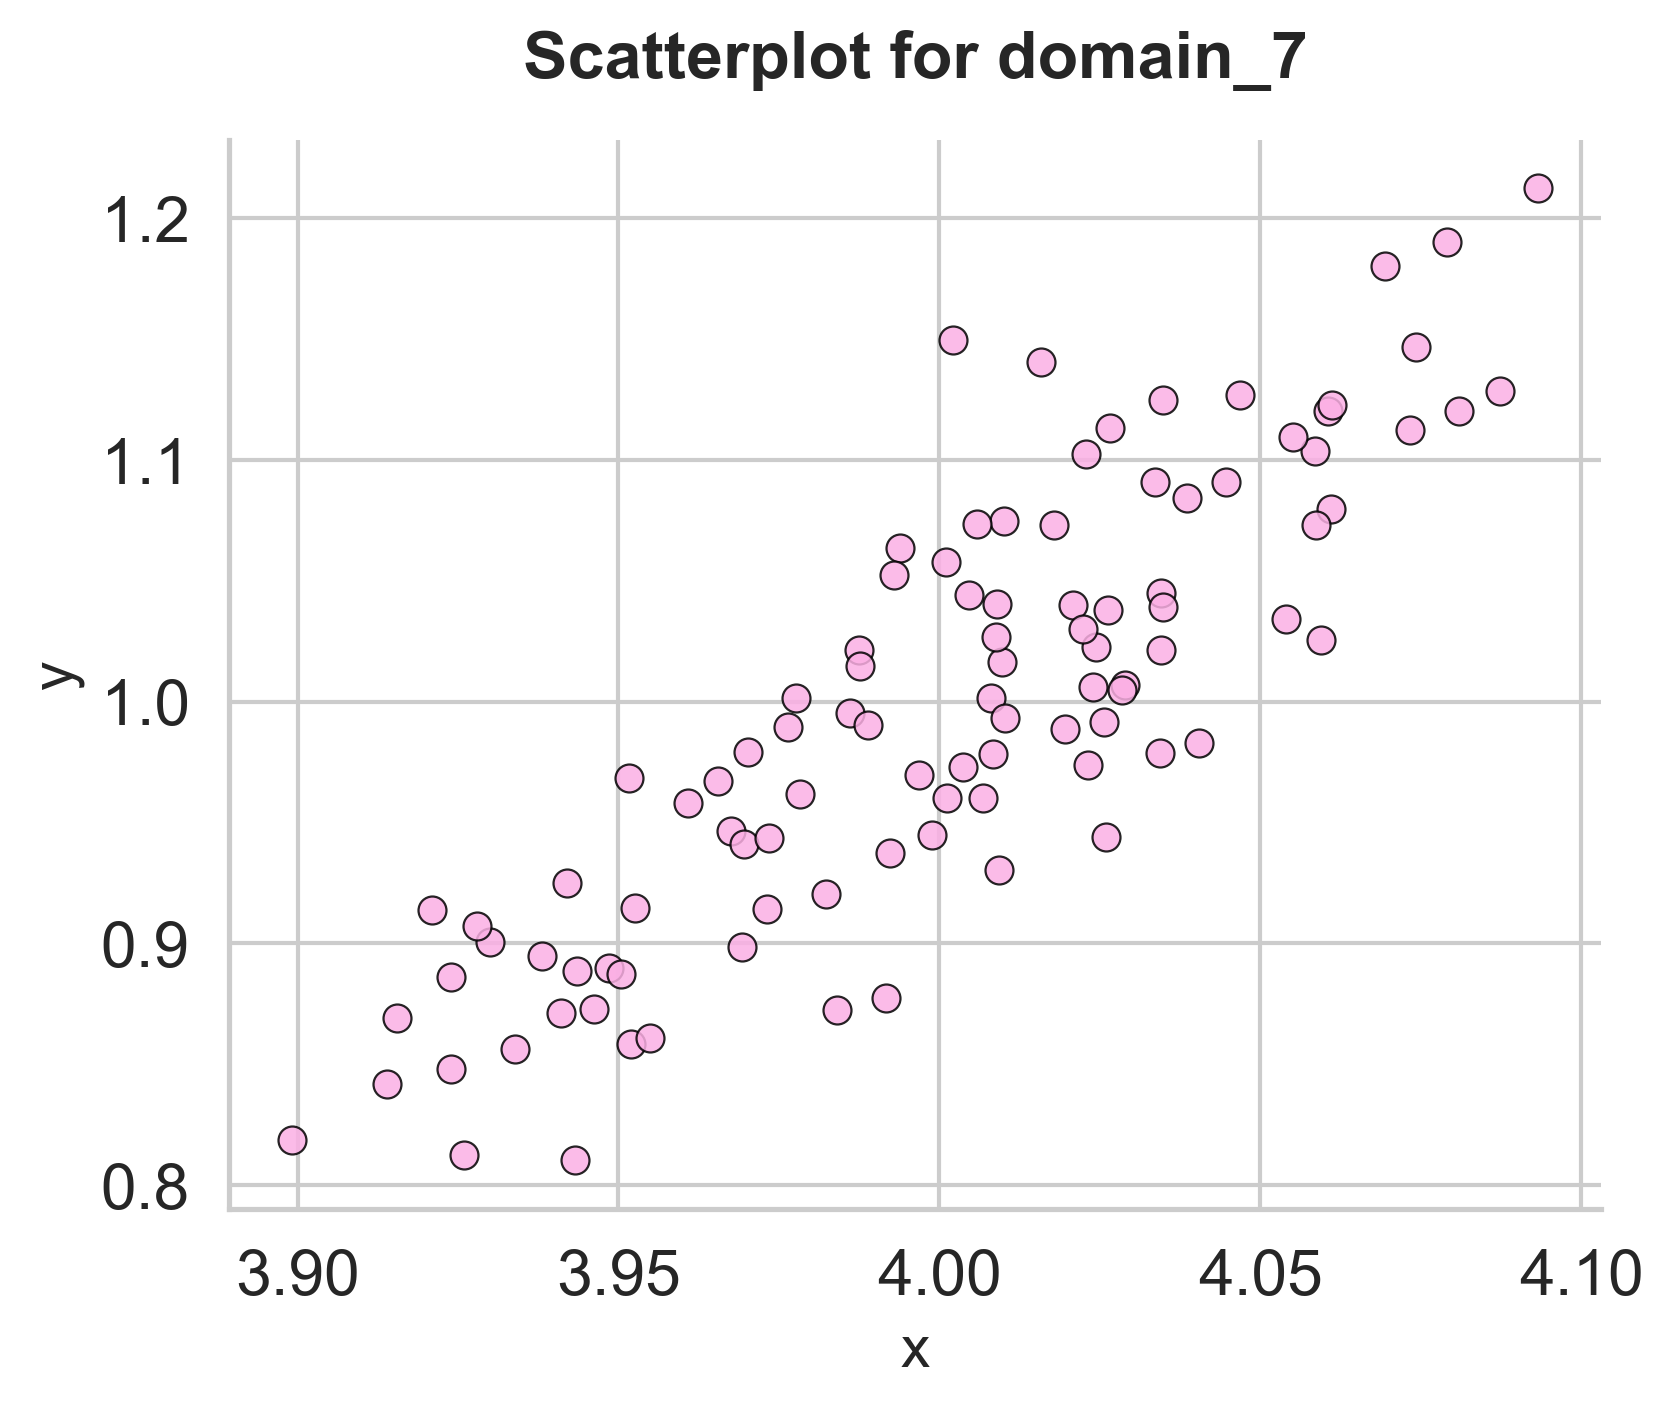

In [5]:
#Global style settings
sns.set_theme(style="whitegrid", font_scale=1.4)  # larger font
sns.set_palette("colorblind")  # colorblind-friendly
plt.rcParams["figure.dpi"] = 300
plt.rcParams["savefig.dpi"] = 600
plt.rcParams["axes.titleweight"] = "bold"
plt.rcParams["axes.titlesize"] = 16
plt.rcParams["axes.labelsize"] = 14

# 1. Scatterplot with no hue
plt.figure(figsize=(6, 5))
sns.scatterplot(
    data=df_with_tags, x="x", y="y",
    color="black", s=40, alpha=0.7, edgecolor=None
)
plt.title("All data (no hue)", pad=15)
sns.despine()
plt.tight_layout()
plt.savefig("all_data_no_hue.pdf", bbox_inches="tight")
plt.show()

# 2. Scatterplot with hue = tag
plt.figure(figsize=(6, 5))
sns.scatterplot(
    data=df_with_tags, x="x", y="y",
    hue="tag", s=40, alpha=0.8, edgecolor=None
)
plt.title("All data (colored by tag)", pad=15)
plt.legend(
    title="Tag", bbox_to_anchor=(1.02, 1), loc='upper left',
    borderaxespad=0, frameon=False
)
sns.despine()
plt.tight_layout()
plt.savefig("all_data_hue.pdf", bbox_inches="tight")
plt.show()

# 3. One scatterplot per tag
tag_names = np.sort(df_with_tags["tag"].unique())
palette = sns.color_palette("colorblind", len(tag_names))

for i, tag in enumerate(tag_names):
    plt.figure(figsize=(6, 5))
    sns.scatterplot(
        data=df_with_tags[df_with_tags["tag"] == tag],
        x="x", y="y",
        color=palette[i], s=45, alpha=0.85, edgecolor="black"
    )
    plt.title(f"Scatterplot for {tag}", pad=15)
    sns.despine()
    plt.tight_layout()
    plt.savefig(f"scatterplot_{tag}.pdf", bbox_inches="tight")
    plt.show()